In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
from pandas.io.json import json_normalize
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from FUNCIONES_TASAS import *

In [2]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [4]:
df=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_CSV/AL30_COMPLETE_TASAS.csv")

In [5]:
dato_muestra=df

# CORRELACION ENTRE LOS DATOS

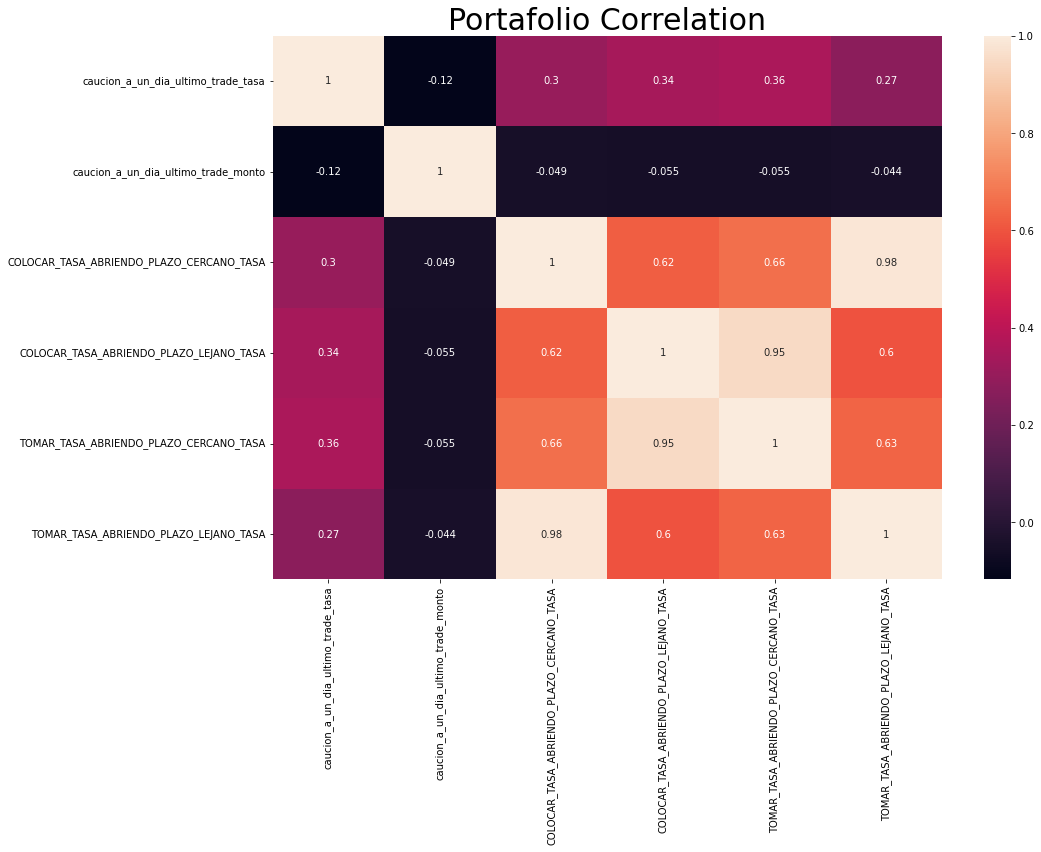

In [5]:
correlation_mat = dato_muestra.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

# GRAFICAS GENERALES

Text(0.5, 1.0, 'Grafica Causion a un dia ultimo trade tasa')

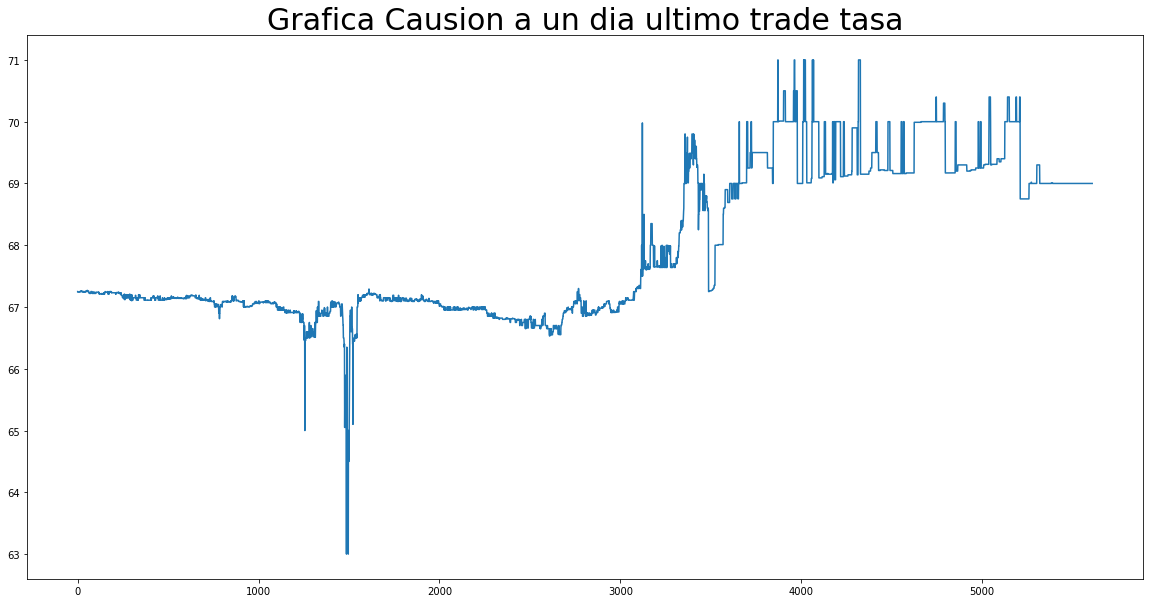

In [6]:
dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"].plot(figsize=(20,10))
plt.title("Grafica Causion a un dia ultimo trade tasa", fontsize=30)

Text(0.5, 1.0, 'Grafica Causion a un dia ultimo trade monto')

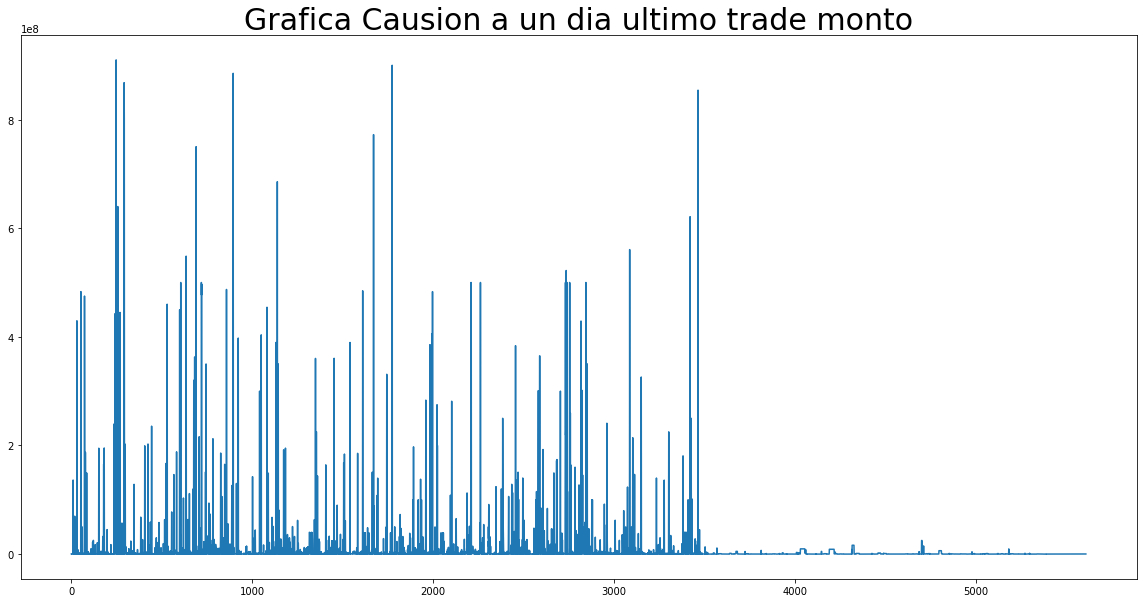

In [7]:
dato_muestra["caucion_a_un_dia_ultimo_trade_monto"].plot(figsize=(20,10))
plt.title("Grafica Causion a un dia ultimo trade monto", fontsize=30)

Text(0.5, 1.0, 'Tomar Tasa Abriendo Cercano vs Tomar Tasa Abriendo Lejano')

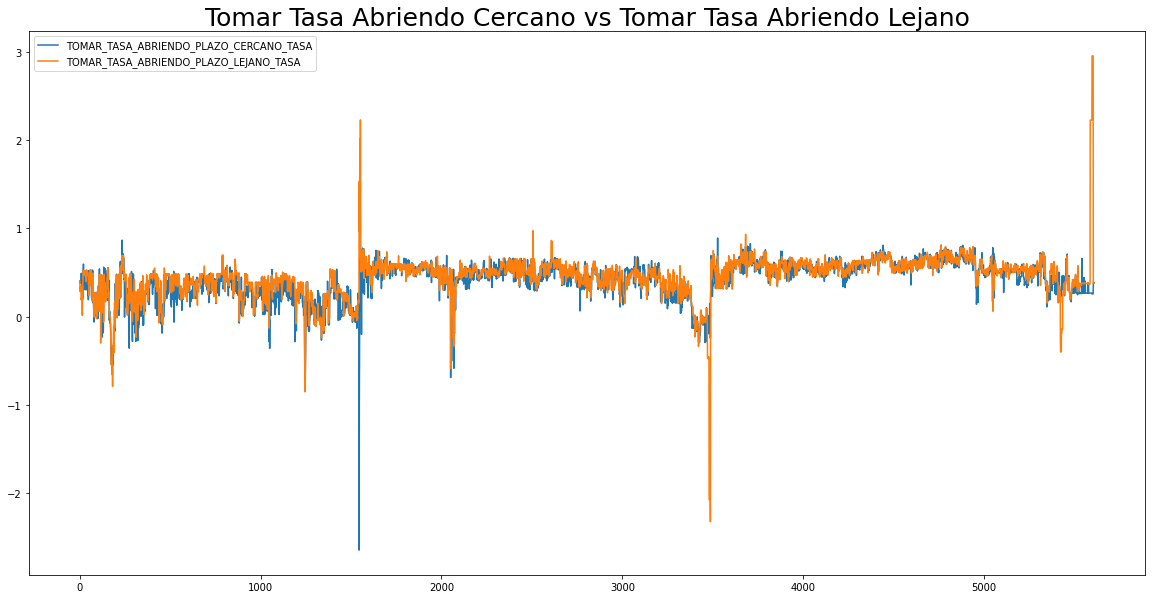

In [8]:
dato_muestra[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]].plot(figsize=(20,10))
plt.title("Tomar Tasa Abriendo Cercano vs Tomar Tasa Abriendo Lejano", fontsize=25)

Text(0.5, 1.0, 'Tomar Tasa Abriendo Cercano vs Tomar Tasa Abriendo Lejano')

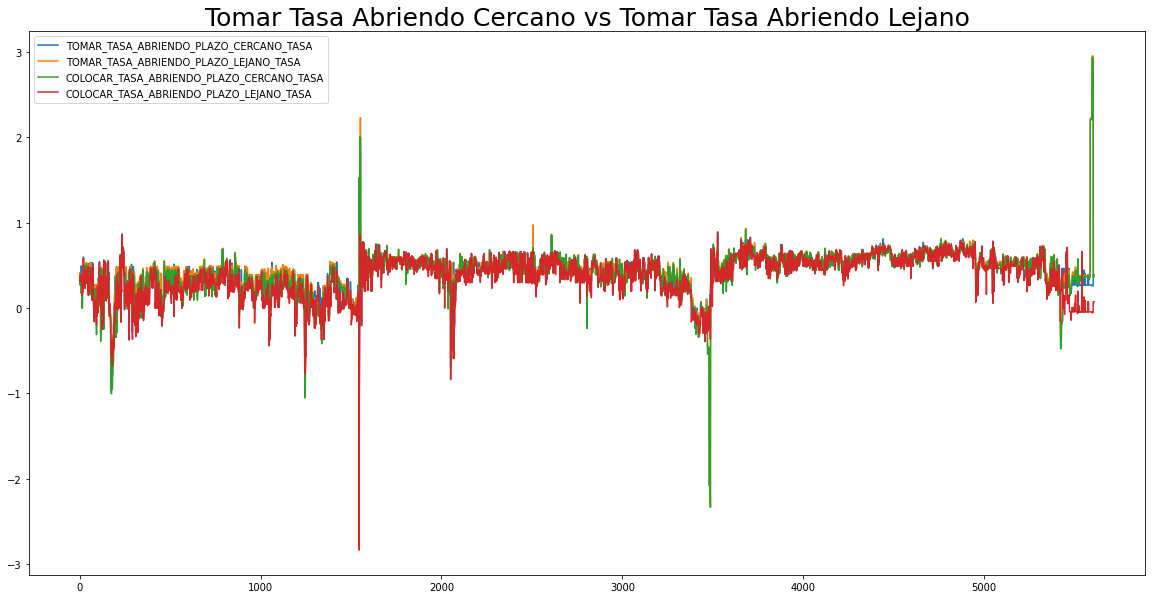

In [9]:
dato_muestra[["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]].plot(figsize=(20,10))
plt.title("Tomar Tasa Abriendo Cercano vs Tomar Tasa Abriendo Lejano", fontsize=25)

# SPREAD

In [10]:
dato_muestra

,ticker,caucion_a_un_dia_ultimo_trade_tasa,caucion_a_un_dia_ultimo_trade_monto,COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA,TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA,time
0,AL30,67.25,183060.37,0.340921,0.368681,0.389028,0.408068,2023-04-19 15:02:32.504238
1,AL30,67.25,413023.04,0.340921,0.368681,0.389028,0.408068,2023-04-19 15:02:42.504503
2,AL30,67.24,573278.20,0.265913,0.312460,0.379653,0.286238,2023-04-19 15:02:52.522560
3,AL30,67.24,116231.00,0.275286,0.312460,0.379653,0.295612,2023-04-19 15:03:02.527854
4,AL30,67.24,63789.38,0.275286,0.312460,0.379653,0.295612,2023-04-19 15:03:12.557203
...,...,...,...,...,...,...,...,...
5605,AL30,69.00,200000.00,0.365928,0.070656,0.385699,0.381257,2023-04-21 20:00:47.752672
5606,AL30,69.00,200000.00,0.365928,0.070656,0.385699,0.381257,2023-04-21 20:01:20.689192
5607,AL30,69.00,200000.00,0.365928,0.070656,0.385699,0.381257,2023-04-21 20:02:58.460419
5608,AL30,69.00,200000.00,0.365928,0.070656,0.385699,0.381257,2023-04-21 20:04:34.512685


In [11]:
dato_muestra["SPREAD_COLOCAR"]=dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-(dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"]/100)
dato_muestra["SPREAD_COLOCAR"]=(dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"]/100)-dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]

<Axes: >

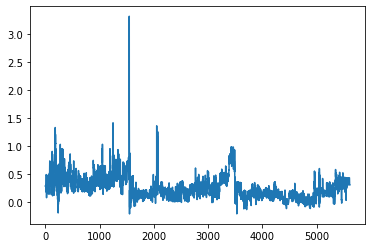

In [12]:
dato_muestra["SPREAD_COLOCAR"].plot()

In [13]:
dato_muestra["SPREAD_COLOCAR"]=dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]/dato_muestra["caucion_a_un_dia_ultimo_trade_tasa"]

Text(0.5, 1.0, 'Colocar Tasa Abriendo Cercano vs Colocar Tasa Abriendo Lejano')

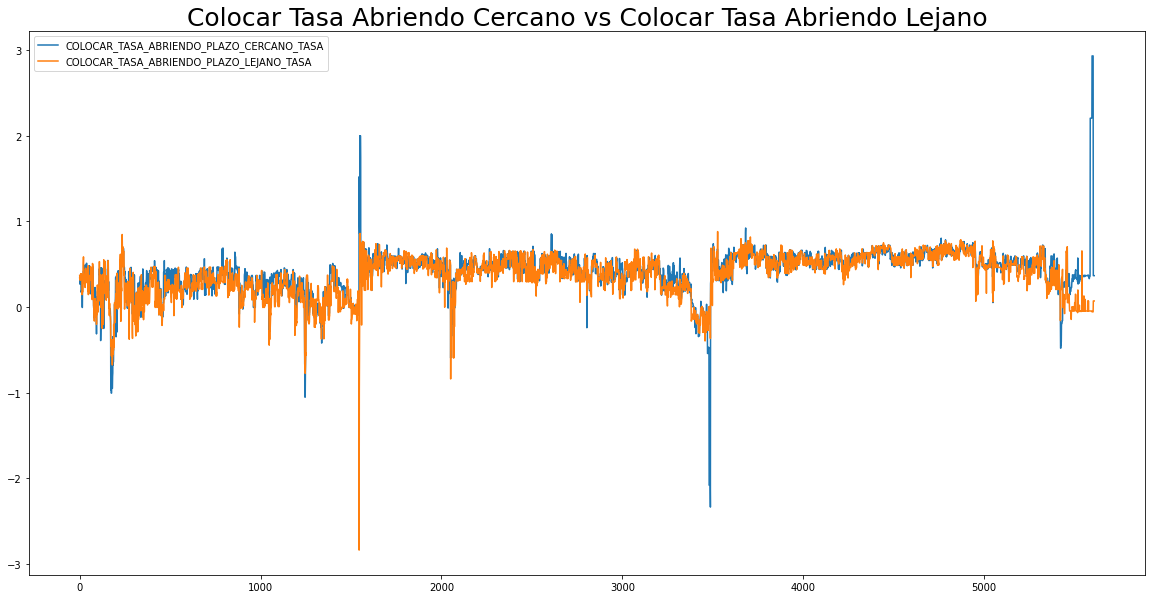

In [14]:
dato_muestra[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]].plot(figsize=(20,10))
plt.title("Colocar Tasa Abriendo Cercano vs Colocar Tasa Abriendo Lejano", fontsize=25)

# MEDIAS MOVILES

**1.TASA_ABRIENDO_PLAZO_CERCANO**

ADF Statistic: -5.359129
p-value: 0.000004
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


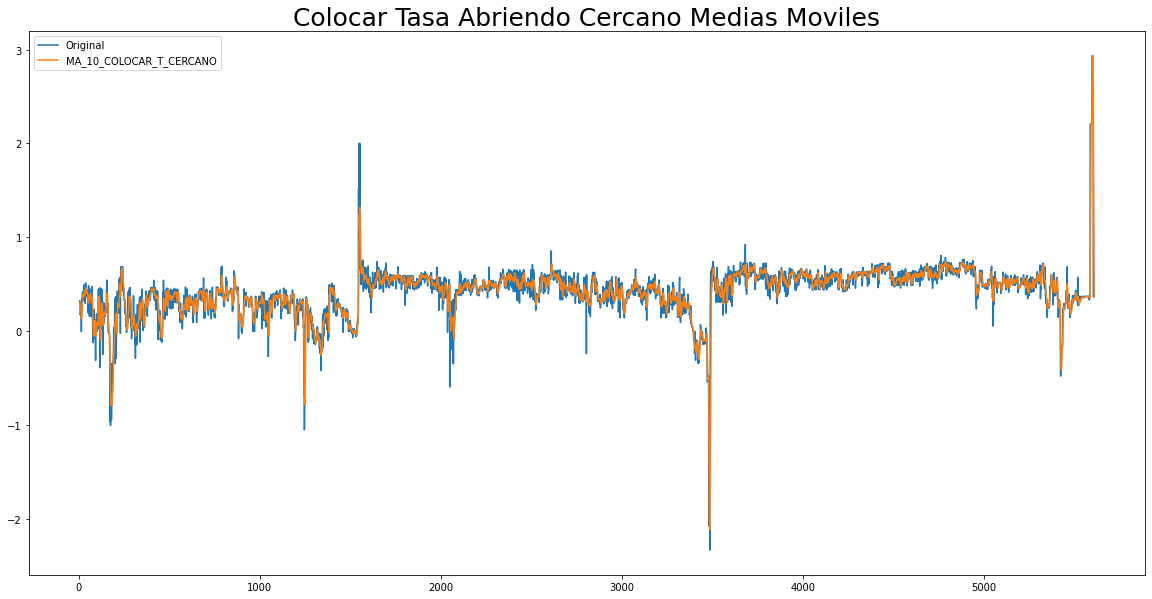

In [15]:
media_movil_1=pd.DataFrame()
media_movil_1["Original"]=dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA']
media_movil_1['MA_10_COLOCAR_T_CERCANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=6).mean()
#media_movil_1['MA_30_COLOCAR_T_CERCANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=30).mean()
#media_movil_1['MA_70_COLOCAR_T_CERCANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=70).mean()
media_movil_1.dropna(inplace=True)
media_movil_1.plot(figsize=(20,10))
plt.title("Colocar Tasa Abriendo Cercano Medias Moviles", fontsize=25)

adf_test(media_movil_1["Original"])

ADF Statistic: -4.390389
p-value: 0.000309
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


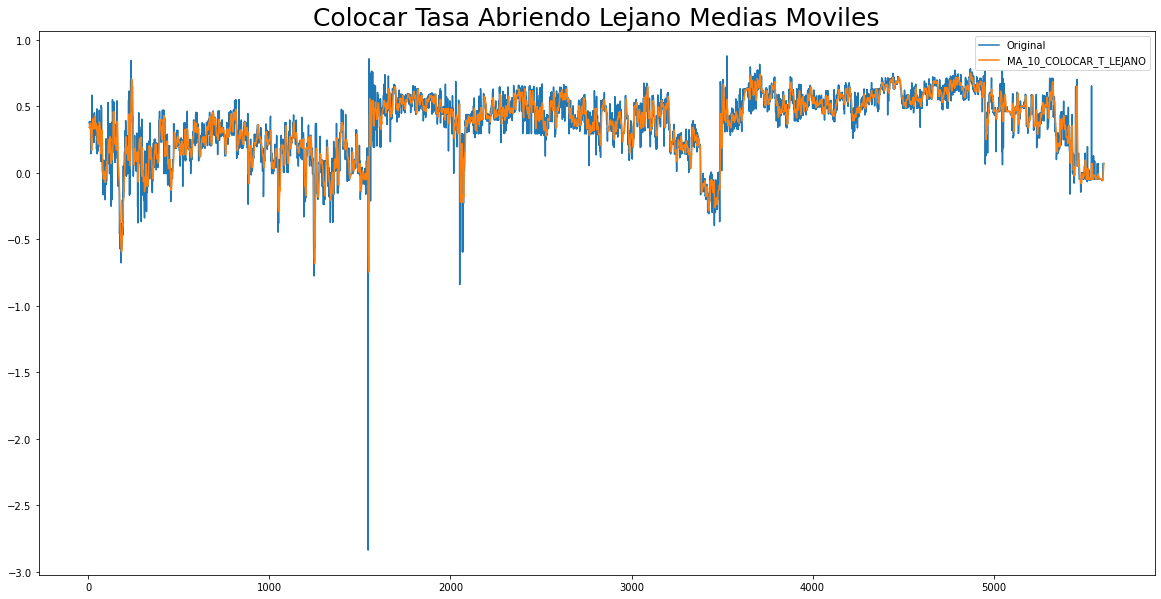

In [16]:
media_movil_2=pd.DataFrame()
media_movil_2["Original"]=dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA']
media_movil_2['MA_10_COLOCAR_T_LEJANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=6).mean()
#media_movil_2['MA_30_COLOCAR_T_LEJANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=30).mean()
#media_movil_2['MA_70_COLOCAR_T_LEJANO'] = dato_muestra['COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=70).mean()
media_movil_2.dropna(inplace=True)
media_movil_2.plot(figsize=(20,10))

plt.title("Colocar Tasa Abriendo Lejano Medias Moviles", fontsize=25)
adf_test(media_movil_2["Original"])

ADF Statistic: -5.831706
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


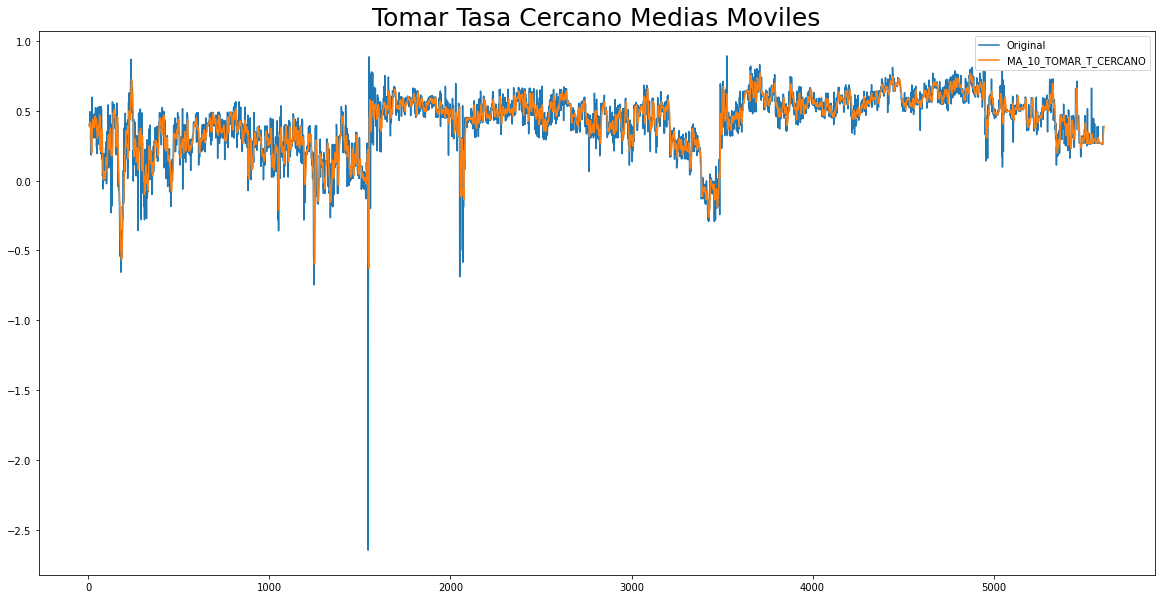

In [17]:
media_movil_3=pd.DataFrame()
media_movil_3["Original"]=dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA']
media_movil_3['MA_10_TOMAR_T_CERCANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=6).mean()
#media_movil_3['MA_30_TOMAR_T_CERCANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=30).mean()
#media_movil_3['MA_70_TOMAR_T_CERCANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA'].rolling(window=70).mean()
media_movil_3.dropna(inplace=True)
media_movil_3.plot(figsize=(20,10))
plt.title("Tomar Tasa Cercano Medias Moviles", fontsize=25)
adf_test(media_movil_3["Original"])

ADF Statistic: -7.584829
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


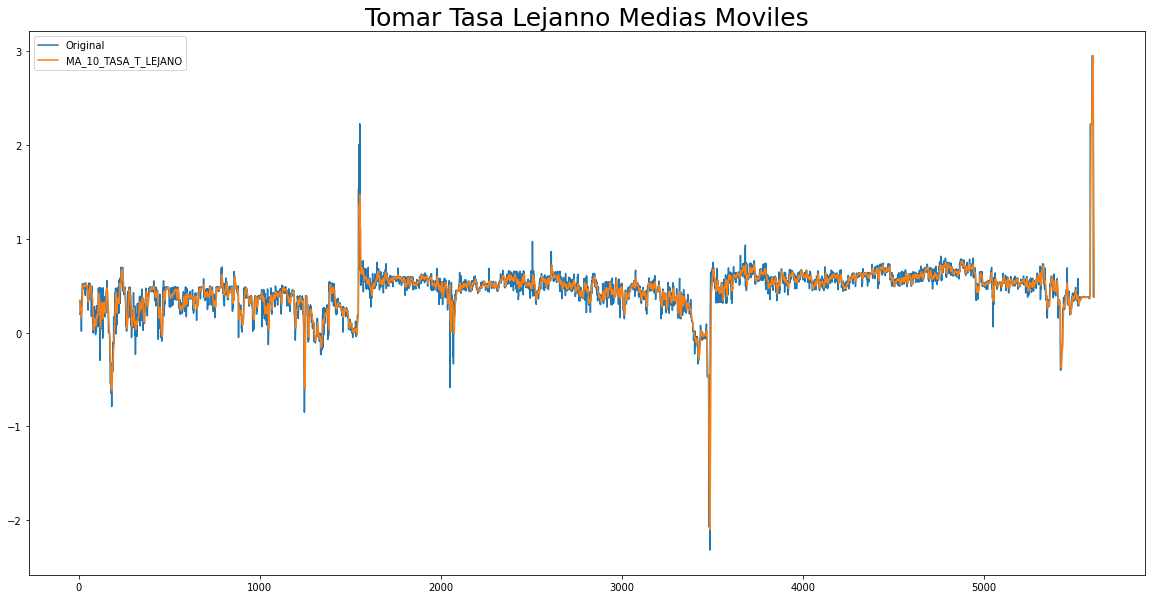

In [18]:
media_movil_4=pd.DataFrame()
media_movil_4["Original"]=dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA']
media_movil_4['MA_10_TASA_T_LEJANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=6).mean()
#media_movil_4['MA_30_COLOCAR_T_LEJANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=30).mean()
#media_movil_4['MA_70_COLOCAR_T_LEJANO'] = dato_muestra['TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA'].rolling(window=70).mean()
media_movil_4.dropna(inplace=True)
media_movil_4.plot(figsize=(20,10))
plt.title("Tomar Tasa Lejanno Medias Moviles", fontsize=25)
adf_test(media_movil_4["Original"])

# DISTRIBUCIONES

**COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


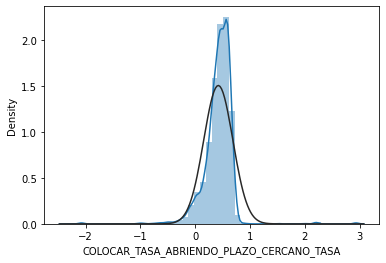

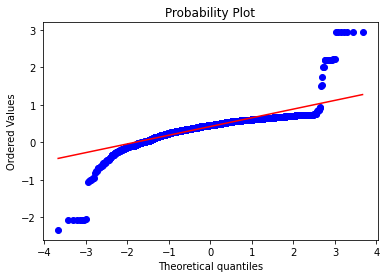

In [19]:
sns.distplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"], plot=plt)

**COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


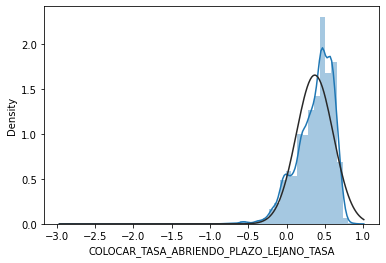

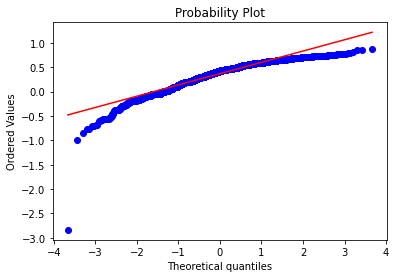

In [20]:
sns.distplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"], plot=plt)
#kurt=kurtosis(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"])
#skew=skew(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"])
#print("Kurtosis: ",kurt)
#print("Skewness: ",skew)

**TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


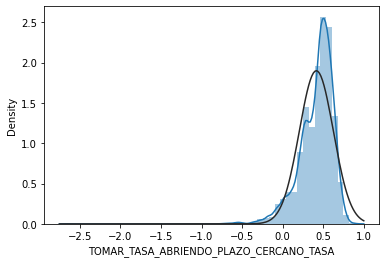

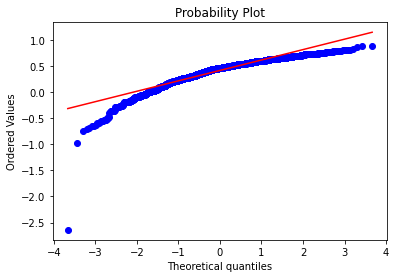

In [21]:
sns.distplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"], plot=plt)

**TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


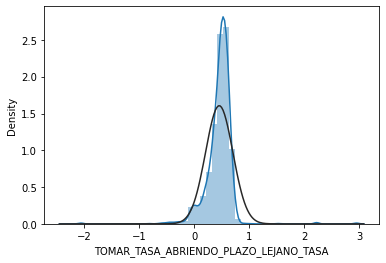

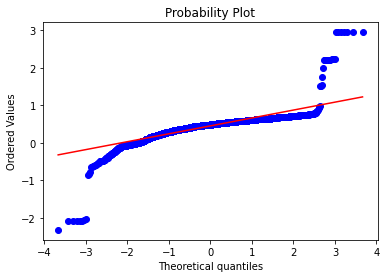

In [22]:
sns.distplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"], plot=plt)

# ANALISIS DE SERIES DE TIEMPO

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

**COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA**

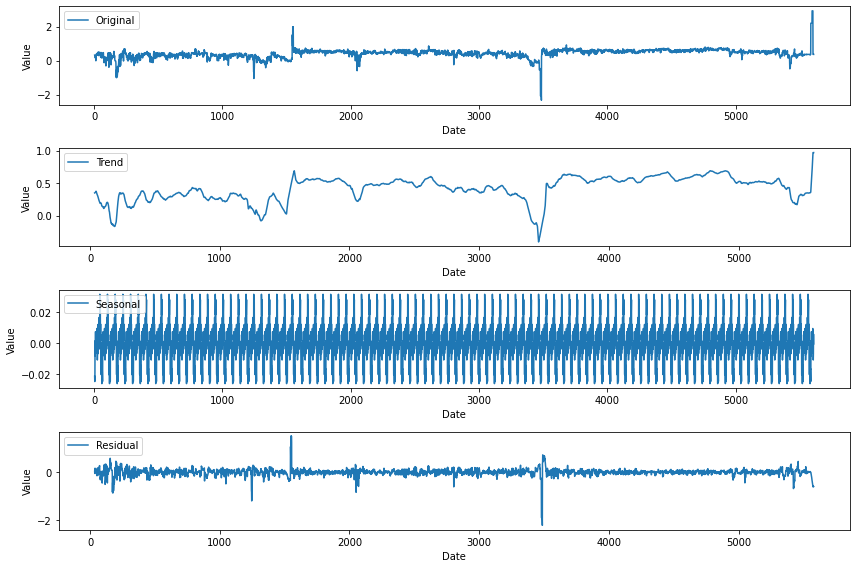

In [24]:
decomposition = seasonal_decompose(media_movil_1["Original"], model="additive", period=60)
# Original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(media_movil_1["Original"], label="Original")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label="Trend")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonal")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label="Residual")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


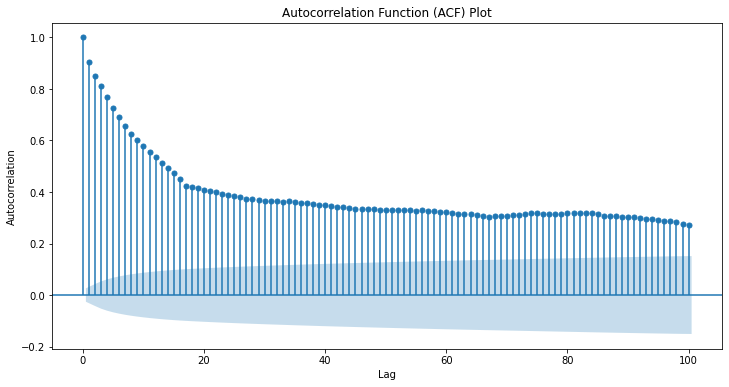

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(media_movil_1["Original"], lags=100, ax=ax)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()


**COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA**

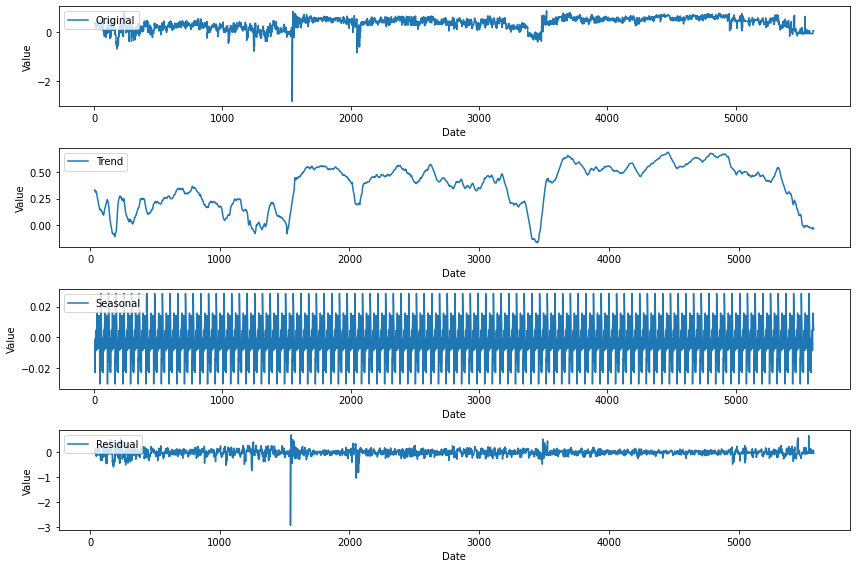

In [26]:
decomposition = seasonal_decompose(media_movil_2["Original"], model="additive", period=60)
# Original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(media_movil_2["Original"], label="Original")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label="Trend")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonal")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label="Residual")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

plt.tight_layout()
plt.show()



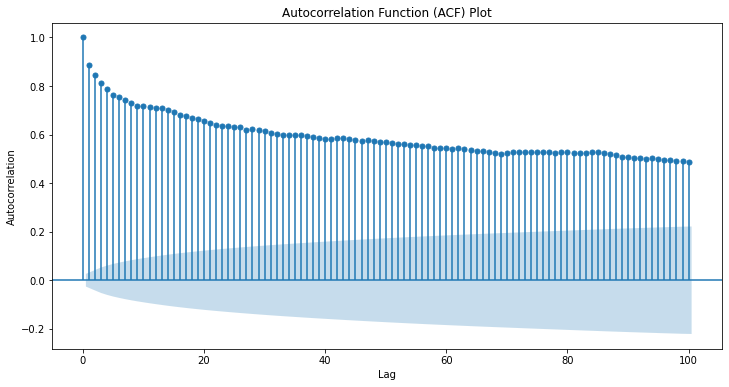

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(media_movil_2["Original"], lags=100, ax=ax)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()

**TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA**

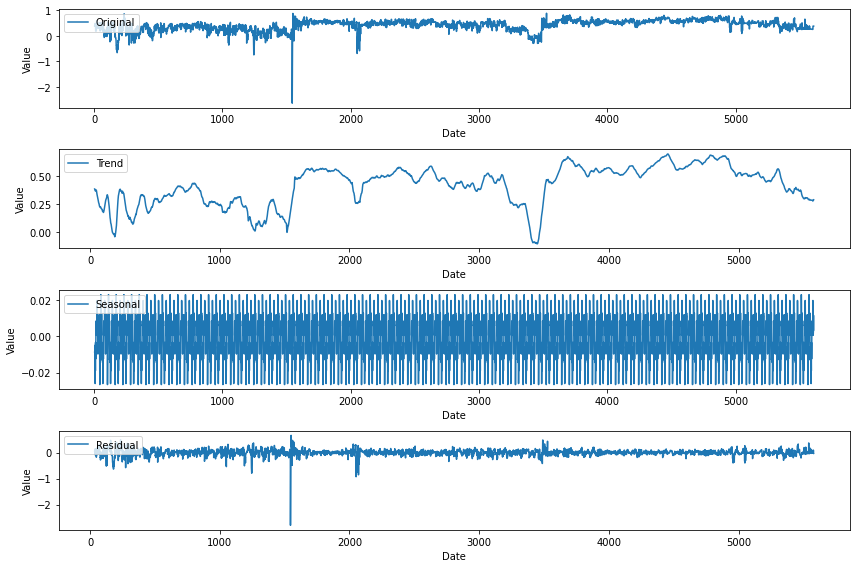

In [28]:
decomposition = seasonal_decompose(media_movil_3["Original"], model="additive", period=60)
# Original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(media_movil_3["Original"], label="Original")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label="Trend")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonal")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label="Residual")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

plt.tight_layout()
plt.show()



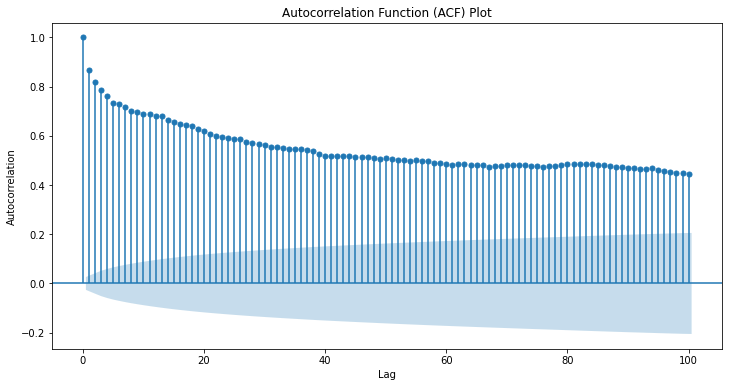

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(media_movil_3["Original"], lags=100, ax=ax)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()

**TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA**

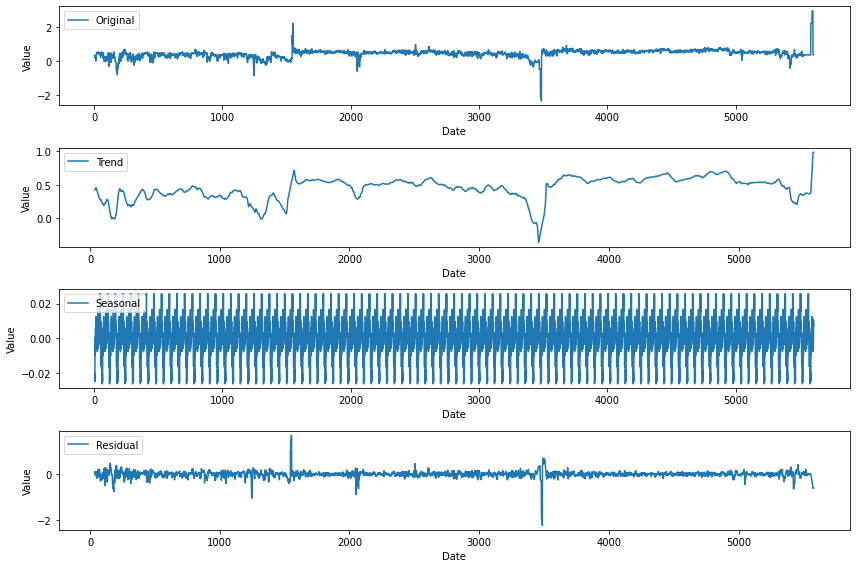

In [30]:
decomposition = seasonal_decompose(media_movil_4["Original"], model="additive", period=60)
# Original time series
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(media_movil_4["Original"], label="Original")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label="Trend")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonal")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label="Residual")
plt.legend(loc="upper left")
plt.xlabel("Date")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

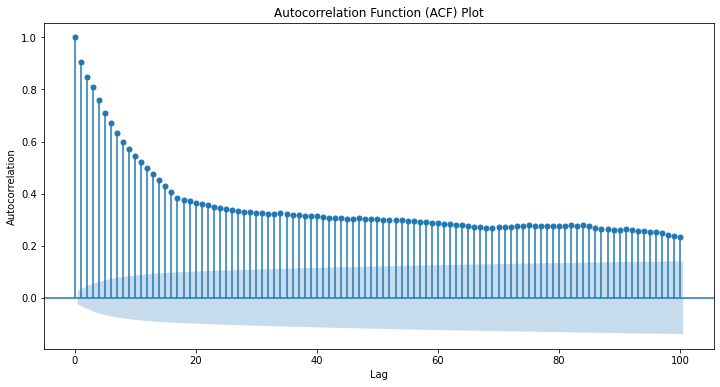

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(media_movil_4["Original"], lags=100, ax=ax)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()

In [32]:
df

,ticker,caucion_a_un_dia_ultimo_trade_tasa,caucion_a_un_dia_ultimo_trade_monto,COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA,TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA,time,SPREAD_COLOCAR
0,AL30,67.25,183060.37,0.340921,0.368681,0.389028,0.408068,2023-04-19 15:02:32.504238,0.005069
1,AL30,67.25,413023.04,0.340921,0.368681,0.389028,0.408068,2023-04-19 15:02:42.504503,0.005069
2,AL30,67.24,573278.20,0.265913,0.312460,0.379653,0.286238,2023-04-19 15:02:52.522560,0.003955
3,AL30,67.24,116231.00,0.275286,0.312460,0.379653,0.295612,2023-04-19 15:03:02.527854,0.004094
4,AL30,67.24,63789.38,0.275286,0.312460,0.379653,0.295612,2023-04-19 15:03:12.557203,0.004094
...,...,...,...,...,...,...,...,...,...
5605,AL30,69.00,200000.00,0.365928,0.070656,0.385699,0.381257,2023-04-21 20:00:47.752672,0.005303
5606,AL30,69.00,200000.00,0.365928,0.070656,0.385699,0.381257,2023-04-21 20:01:20.689192,0.005303
5607,AL30,69.00,200000.00,0.365928,0.070656,0.385699,0.381257,2023-04-21 20:02:58.460419,0.005303
5608,AL30,69.00,200000.00,0.365928,0.070656,0.385699,0.381257,2023-04-21 20:04:34.512685,0.005303
